<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-Co-relationship-Analysis" data-toc-modified-id="Feature-Co-relationship-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature Co-relationship Analysis</a></span></li></ul></div>

## Feature Co-relationship Analysis

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sp


In [17]:
sb = pd.read_csv('./data/DF_solubility_features.csv')
print('There ara ', sb.shape[0], ' unique proteins, and ', sb.shape[1]-1, ' features for each protein.')
sb.head()


There ara  16082  unique proteins, and  43  features for each protein.


,Unnamed: 0,pf_cultivation_id,prest_id,aa_seq,solubility_class_1M,bio_pI,bio_mW,bio_aromaticity,bio_instability,bio_gravy,...,frac_aliphatic,frac_uncharged_polar,frac_polar,frac_hydrophobic,frac_positive,frac_sulfur,frac_negative,frac_amide,frac_alcohol,aa_len
0,0,255,230050,QLKGRDLLTLKNFTGEEIKYMLWLSADLKFRIKQKGEYLPLLQGKS...,3.0,9.462341,11901.7288,0.075472,31.881132,-0.148113,...,0.405660,0.216981,0.301887,0.452830,0.160377,0.037736,0.103774,0.056604,0.160377,106
1,1,263,230548,LPYAMKPIDYYTETKILQERAVLGANDPEKNFLTTAIRPHGIFGPR...,2.0,7.105164,13574.4798,0.099174,41.680992,-0.126446,...,0.462810,0.173554,0.256198,0.528926,0.140496,0.016529,0.107438,0.082645,0.090909,121
2,2,364,231390,IAELGVPLSQVKSISGTAQDGNTEPLPPDSGDKNLVIQKSKDEAQD...,5.0,3.922302,12320.4143,0.025862,39.717241,-0.398276,...,0.413793,0.284483,0.318966,0.431034,0.060345,0.025862,0.189655,0.103448,0.181034,116
3,3,441,230501,SDSDVGSGGIRPKQPRMLQENTRMDMENEESMMSYEGDGGEASHGL...,5.0,3.805847,13537.7451,0.048780,78.778862,-1.313821,...,0.260163,0.276423,0.373984,0.276423,0.073171,0.040650,0.300813,0.073171,0.203252,123
4,4,521,140193,HPAYNPKNFSNDIMLLQLERKAKWTTAVRPLRLPSSKAQVKPGQLC...,4.5,9.652649,16225.6860,0.081633,24.140816,-0.330612,...,0.414966,0.231293,0.360544,0.442177,0.156463,0.054422,0.061224,0.088435,0.142857,147


In [26]:
print('Protein features:')
sb._info_axis.to_numpy()[1:]


Protein features:


array(['pf_cultivation_id', 'prest_id', 'aa_seq', 'solubility_class_1M',
       'bio_pI', 'bio_mW', 'bio_aromaticity', 'bio_instability',
       'bio_gravy', 'list_comp_A', 'list_comp_R', 'list_comp_N',
       'list_comp_D', 'list_comp_C', 'list_comp_Q', 'list_comp_E',
       'list_comp_G', 'list_comp_H', 'list_comp_I', 'list_comp_L',
       'list_comp_K', 'list_comp_M', 'list_comp_F', 'list_comp_P',
       'list_comp_S', 'list_comp_T', 'list_comp_W', 'list_comp_Y',
       'list_comp_V', 'charge', 'abs_charge', 'avg_charge',
       'abs_avg_charge', 'frac_aliphatic', 'frac_uncharged_polar',
       'frac_polar', 'frac_hydrophobic', 'frac_positive', 'frac_sulfur',
       'frac_negative', 'frac_amide', 'frac_alcohol', 'aa_len'],
      dtype=object)

pf_cultivation_id       0.029633
prest_id                0.044070
solubility_class_1M     1.000000
bio_pI                  0.173016
bio_mW                  0.197073
bio_aromaticity         0.276186
bio_instability         0.170542
bio_gravy               0.239084
list_comp_A             0.052933
list_comp_R             0.084395
list_comp_N             0.038067
list_comp_D             0.056812
list_comp_C             0.014139
list_comp_Q             0.050873
list_comp_E             0.026540
list_comp_G             0.072000
list_comp_H             0.022588
list_comp_I             0.149693
list_comp_L             0.136073
list_comp_K             0.100172
list_comp_M             0.042056
list_comp_F             0.192740
list_comp_P             0.181169
list_comp_S             0.109453
list_comp_T             0.000757
list_comp_W             0.127324
list_comp_Y             0.190641
list_comp_V             0.126200
charge                  0.123209
abs_charge              0.063336
avg_charge

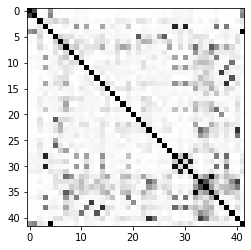

In [85]:
corr = sb.drop(['Unnamed: 0', 'aa_seq'], axis=1).astype('float').corr().abs()
corr_axis = corr._info_axis.to_numpy()
plt.imshow(corr, cmap='Greys')
corr['solubility_class_1M']



In [81]:
corr.values[[np.arange(corr.shape[0])]*2] = 0
spcorr = sp.coo_matrix((corr > 0.5))
spcorr = sp.triu(spcorr)
r_name, c_name, score = [], [], []
for r, c in zip(spcorr.row, spcorr.col):
    r_name.append(corr_axis[r])
    c_name.append(corr_axis[c])
    score.append(corr.iloc[r, c])
corr_top = pd.DataFrame(data={
    'ind1': spcorr.row, 
    'name1': r_name,
    'ind2': spcorr.col,
    'name2': c_name,
    'corr_score': score})
corr_top.sort_values(by=['corr_score'], inplace=True, ascending=False)


/Users/nyxfer/anaconda3/envs/HGCN/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


,ind1,name1,ind2,name2,corr_score
7,4,bio_mW,41,aa_len,0.991922
33,32,frac_aliphatic,35,frac_hydrophobic,0.953970
27,28,charge,30,avg_charge,0.941507
4,3,bio_pI,30,avg_charge,0.895609
3,3,bio_pI,28,charge,0.874033
30,29,abs_charge,31,abs_avg_charge,0.871772
25,23,list_comp_S,40,frac_alcohol,0.847489
21,14,list_comp_E,38,frac_negative,0.842110
17,12,list_comp_C,37,frac_sulfur,0.808695
36,33,frac_uncharged_polar,40,frac_alcohol,0.801816


## Amino Acid Sequence

